In [20]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("data/2023.csv")

In [21]:
raw_data

,year,company_ric,storyId,versionCreated,headline,newsText
0,2023,POOL.OQ,urn:newsml:reuters.com:20231220:nFWN3DF0WC:1,2023-12-20 12:55:28.618,POOL CORP <POOL.O>: STIFEL RAISES TARGET PRICE...,NaN
1,2023,POOL.OQ,urn:newsml:reuters.com:20231208:nFWN3D32EF:1,2023-12-08 14:13:14.145,POOL CORP <POOL.O>: DEUTSCHE BANK CUTS TARGET ...,NaN
2,2023,POOL.OQ,urn:newsml:reuters.com:20231208:nFWN3D327F:1,2023-12-08 14:13:12.833,POOL CORP <POOL.O>: DEUTSCHE BANK CUTS TO HOLD...,NaN
3,2023,CHRW.OQ,urn:newsml:reuters.com:20231229:nFWN3DO07V:1,2023-12-29 22:01:31.000,BRIEF-CH Robinson Worldwide Entered Into Lette...,Dec 29 (Reuters) - CH Robinson Worldwide Inc <...
4,2023,CHRW.OQ,urn:newsml:reuters.com:20231229:nFWN3DO07V:3,2023-12-29 21:46:23.152,CH ROBINSON WORLDWIDE INC - ANCORA AGREED TO ...,Dec 29 (Reuters) - CH Robinson Worldwide Inc <...
...,...,...,...,...,...,...
5250,2023,ADI.OQ,urn:newsml:reuters.com:20231121:nPlx4YWqqM:5,2023-11-21 12:00:08.350,ANALOG DEVICES Q4 ADJUSTED OPERATING INCOME US...,BRIEF-Analog Devices Q4 Adjusted EPS USD 2.01 ...
5251,2023,ADI.OQ,urn:newsml:reuters.com:20231121:nPlx4YWqqM:4,2023-11-21 12:00:07.520,ANALOG DEVICES Q4 EPS USD 1,BRIEF-Analog Devices Q4 Adjusted EPS USD 2.01 ...
5252,2023,ADI.OQ,urn:newsml:reuters.com:20231121:nPlx4YWqqM:3,2023-11-21 12:00:07.486,ANALOG DEVICES Q4 ADJUSTED OPERATING MARGIN 44.7%,BRIEF-Analog Devices Q4 Adjusted EPS USD 2.01 ...
5253,2023,ADI.OQ,urn:newsml:reuters.com:20231121:nPlx4YWqqM:2,2023-11-21 12:00:07.455,"ANALOG DEVICES Q4 REVENUE USD 2,716 MILLION VS...",BRIEF-Analog Devices Q4 Adjusted EPS USD 2.01 ...


In [22]:
data = raw_data.dropna(subset=["newsText"])

data["newsText"]

3       Dec 29 (Reuters) - CH Robinson Worldwide Inc <...
4       Dec 29 (Reuters) - CH Robinson Worldwide Inc <...
5       Dec 29 (Reuters) - CH Robinson Worldwide Inc <...
6       Dec 29 (Reuters) - CH Robinson Worldwide Inc <...
7       (Adds Klaveness Combination Carriers, updates ...
                              ...                        
5250    BRIEF-Analog Devices Q4 Adjusted EPS USD 2.01 ...
5251    BRIEF-Analog Devices Q4 Adjusted EPS USD 2.01 ...
5252    BRIEF-Analog Devices Q4 Adjusted EPS USD 2.01 ...
5253    BRIEF-Analog Devices Q4 Adjusted EPS USD 2.01 ...
5254    BRIEF-Analog Devices Q4 Adjusted EPS USD 2.01 ...
Name: newsText, Length: 3371, dtype: object

In [23]:
for news in data["newsText"].sample(10):
    print("\n\n===")
    print(news)



===
By Stephen Nellis
       Dec 7 (Reuters) - In the first nine months of 2023, U.S.
data breaches increased by 20% compared to the full year 2022,
according to a new study that was commissioned by Apple
<AAPL.O>.
    The iPhone maker paid for the study, which was conducted by
Massachusetts Institute of Technology Professor Stuart E.
Madnick, about a year after it rolled out a new feature to
expand end-to-end encryption for data stored in its iCloud
service. The study, which does not include any findings of data
breaches at Apple itself, argues that breaches are becoming so
commonplace that the only feasible way to protect consumer data
is wider use of end-to-end encryption.
    Such encryption makes it impossible for the company that
stores the data - or anyone who might hack its servers - to
unscramble a user's data without also possessing additional
information, such as the passcode for one of the user's personal
devices. But that encryption approach also makes it impossible
for 

In [24]:
text_lengths = data["newsText"].str.len()
text_lengths.describe()

count     3371.000000
mean      2263.953723
std       3754.952796
min         69.000000
25%        482.000000
50%        950.000000
75%       2629.000000
max      32542.000000
Name: newsText, dtype: float64

<Axes: >

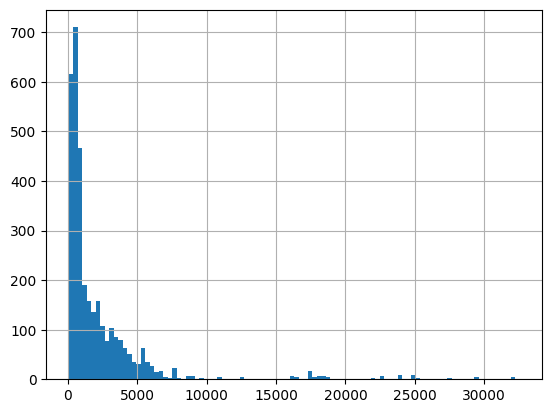

In [25]:
text_lengths.hist(bins=100)

<Axes: >

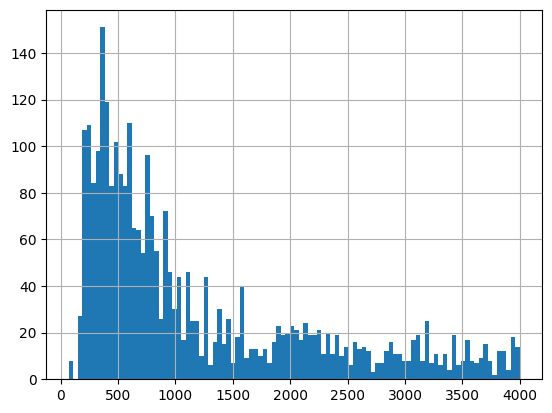

In [26]:
text_lengths[text_lengths < 4000].hist(bins=100)

<Axes: >

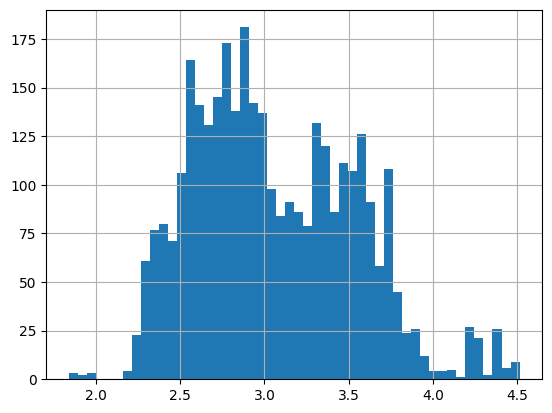

In [27]:
np.log10(text_lengths).hist(bins=50)